<a href="https://colab.research.google.com/github/AkashElnoorkar/Prediction-Using-Decision-Tree-Algorithm/blob/main/PredictionUsingDecisionTreeAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Akash Kishore Elnoorkar Task #6.

In [2]:
# Importing required libraries.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import dataset.

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head() # Print the first 5 rows from our data.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Get the information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Descriptive statistics of the data.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [8]:
# Finding the null values in the dataset.
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
# Showing only target data (Dependent Variable).
print(df['target'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [10]:
# Visualization of the data.

In [13]:
import seaborn as sns

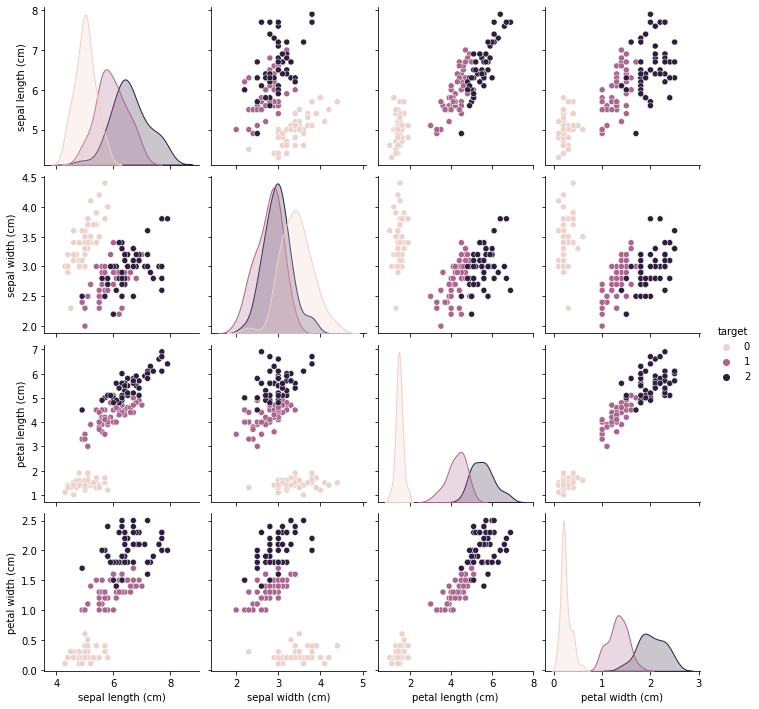

In [14]:
# Checking the distribution of the data.
sns.pairplot(df,hue='target')

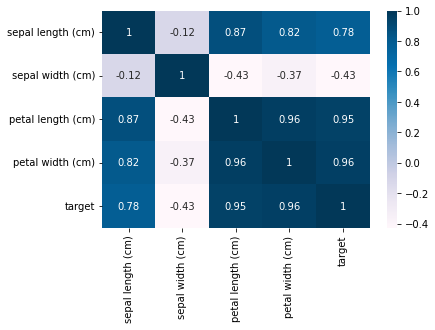

In [15]:
# Checking correlation of the data.
cor = df.corr()
sns.heatmap(cor,annot=True,cmap='PuBu')

In [16]:
# Splitting data into dependant and indepandent variables.
from sklearn.model_selection import train_test_split

fc = [x for x in df.columns if x!="target"] 
x= df[fc]   # or X = df.iloc[:, :-1].values.
y= df["target"] # y = df.iloc[:, 1].values.
X_train, X_test, Y_train, Y_test = train_test_split(x,y, random_state = 100, test_size = 0.30) # take 30% from original data as test.

In [18]:
# Display of data.

print(X_train.shape)
print(X_test.shape) # take 30% from original data.
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [19]:
# Building Decision Tree model.

In [20]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()

In [21]:
# Apply the model on training data set.
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [22]:
# Prediction apply on test data set.
Y_pred = model1.predict(X_test)

In [23]:
data1 = pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
data1.head() # print only first 5 values of the prediction data.

,Actual,Predicted
128,2,2
11,0,0
118,2,2
15,0,0
123,2,2


In [24]:
# Elevation of our model.

In [25]:
# Testing the accuracy of model prediction.
from sklearn.metrics import accuracy_score

print("Accuracy is: ", accuracy_score(Y_test,Y_pred )* 100)

Accuracy is:  95.55555555555556


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



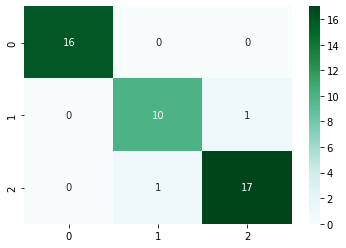

In [27]:
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True,cmap='BuGn')

In [28]:
# Visualization of the Decision Tree model.

[Text(0.4, 0.9, 'Petal length <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'Petal width <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Versicolor'),
 Text(0.2, 0.5, 'Petal length <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Versicolor'),
 Text(0.3, 0.3, 'Sepal length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(0.8, 0.5, 'Petal length <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]\nclass = Virginica'),
 Text(0.7, 0.3, 'Sepal width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(0.6, 0.1, 'gini 

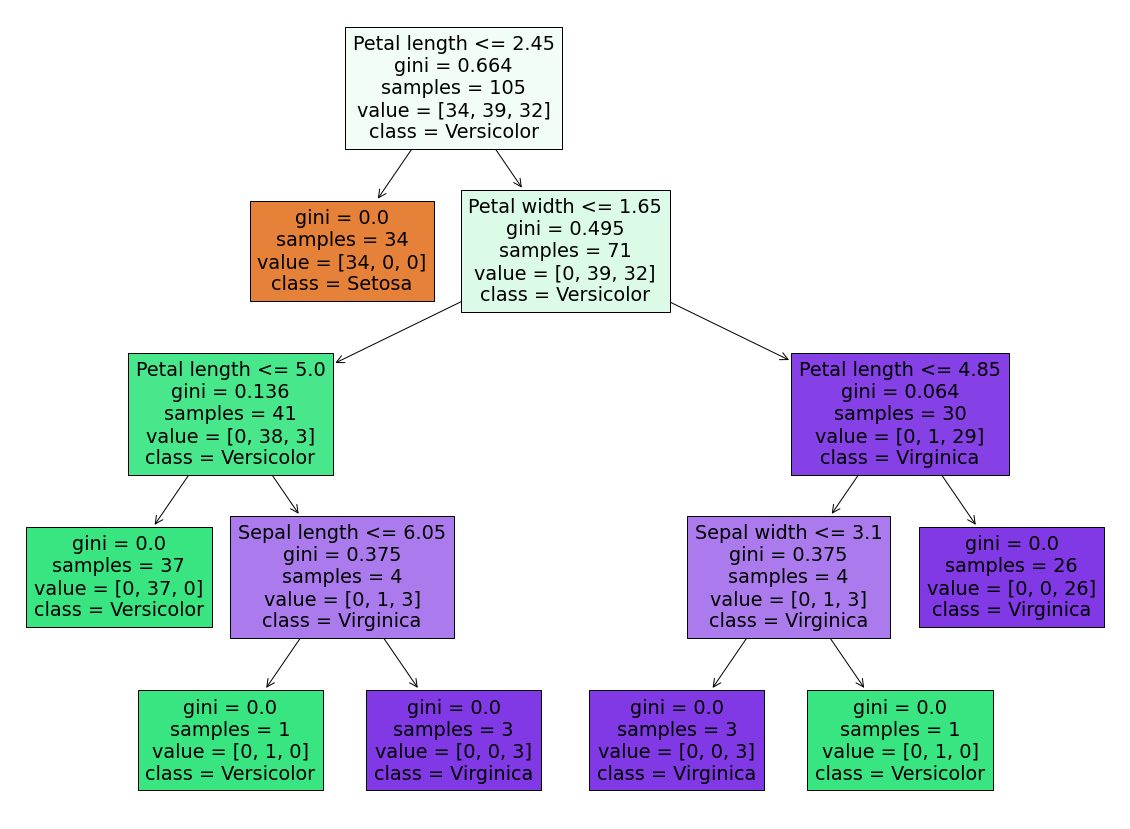

In [29]:
from sklearn.tree import plot_tree

f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plt.figure(figsize = (20,15))
plot_tree(model1,feature_names = f_n, class_names = c_n , filled = True)

In [30]:
modelx= DecisionTreeClassifier().fit(x,y)

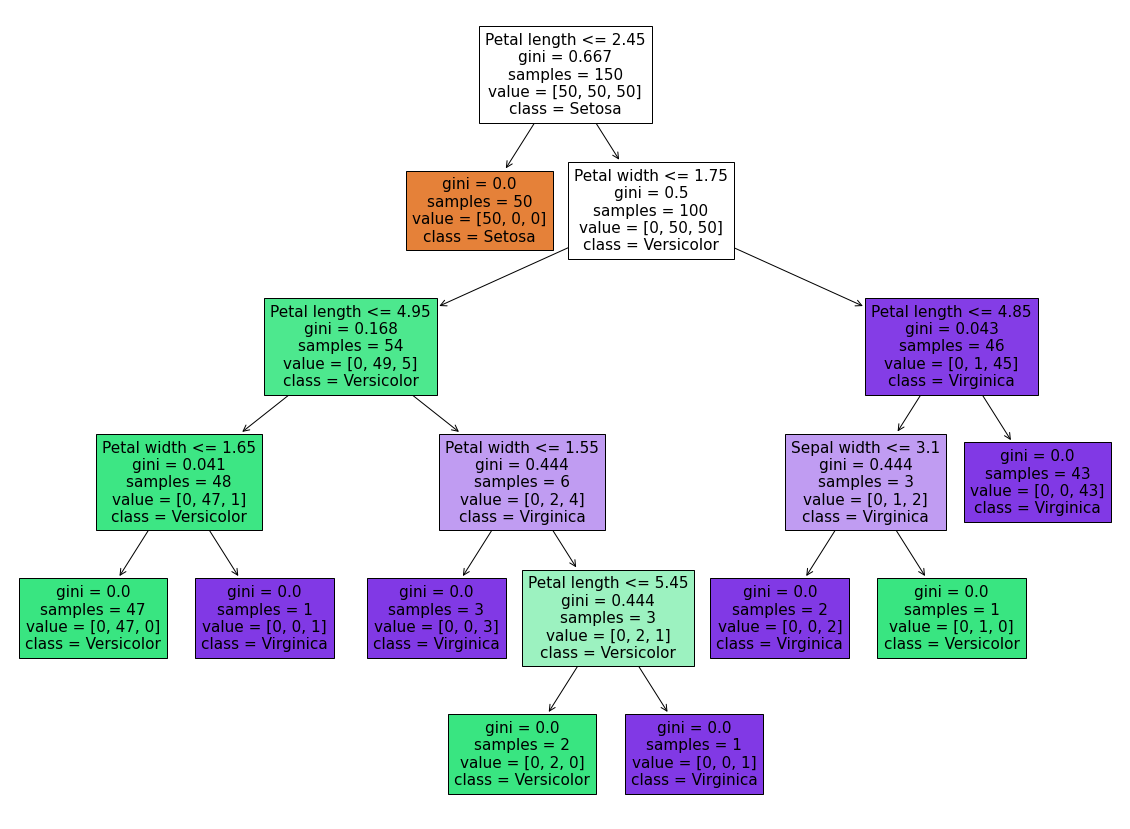

In [31]:
from sklearn import tree

plt.figure(figsize = (20,15))
tree = tree.plot_tree(modelx, feature_names = f_n, class_names = c_n, filled = True)

In [32]:
# You can now feed any test data to this classifer and it would be able to predict the right class accordingly.